In [ ]:
import time
import uuid

from matplotlib import pyplot as plt
from mne import set_log_level

from mne_lsl.datasets import sample
from mne_lsl.player import PlayerLSL as Player
from mne_lsl.stream import StreamLSL as Stream

set_log_level("WARNING")

source_id = "eeg_mock"
fname = "/Users/dannemrodov/Downloads/IR_13_S01.bdf"
player = Player(fname, chunk_size=200, source_id=source_id, n_repeat=np.inf, annotations=True).start()


In [ ]:
sinfo = StreamInfo(
    name="my-stream",
    stype="eeg",
    n_channels=3,
    sfreq=1024,
    dtype="float32",
    source_id=uuid.uuid4().hex,
)
sinfo.set_channel_names(["Fz", "Cz", "Oz"])
sinfo.set_channel_types("eeg")
sinfo.set_channel_units("microvolts")

In [6]:
from mne_lsl.lsl import (
    StreamInfo,
    StreamInlet,
    StreamOutlet,
    local_clock,
    resolve_streams,
)

streams = resolve_streams()
print(len(streams))
print(streams[1].sfreq)

2
512.0


In [19]:
inlet = StreamInlet(streams[0])
inlet.open_stream()
sinfo = inlet.get_sinfo()
len(sinfo.get_channel_names())

65

In [8]:
import uuid

import matplotlib.patches as mpatches
import numpy as np
from matplotlib import pyplot as plt
from mne import Annotations, create_info
from mne.io import RawArray
from mne.viz import set_browser_backend

from mne_lsl.player import PlayerLSL
from mne_lsl.stream import StreamLSL

annotations = Annotations(
    onset=[1, 2, 3],
    duration=[0.1, 0.2, 0.3],
    description=["event1", "event2", "event3"],
)
annotations

<Annotations | 3 segments: event1 (1), event2 (1), event3 (1)>

In [62]:
#player.stop()
#del player 
del stream

In [20]:
from mne_lsl.stream import StreamLSL as Stream
import numpy as np
import time
stream = Stream(bufsize=4, source_id='eye_tracker').connect()
time.sleep(4)
out = stream.get_data()[0][11:13,:]

In [25]:
out

array([[-0.07824518, -0.08432555, -0.07347606, ...,  0.36779638,
         0.35609544,  0.34931739],
       [ 0.22358284,  0.2379458 ,  0.22904926, ...,  0.00345182,
         0.00382103, -0.0007878 ]])

In [26]:
hist, xedges, yedges = np.histogram2d(out[0,:], out[1,:], bins=(15,10), density=True, range=[[-1.78, 1.78], [-1, 1]])
hist

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.39044944, 4.84550562, 0.50561798, 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [58]:
from pylsl import StreamInlet, resolve_stream
import numpy as np
from bokeh.plotting import figure, curdoc
from bokeh.models import ColumnDataSource, LinearColorMapper
from bokeh.layouts import column
from mne_lsl.stream import StreamLSL as Stream
import pandas as pd


# ---- LSL Setup ----
print("Looking for an Eye-Tracking stream...")
estream = EyeTrackingStream(bufsize=4, source_id='eye_tracker').connect()

# ---- Data Handling ----
# Initialize empty data arrays
x_coords = []
y_coords = []

# Function to get data from LSL and update the heatmap
def update_heatmap():
    global x_coords, y_coords

    # Get a new sample
    edata = estream.average_eye_data()

    # Assuming the x and y coordinates are the first two elements in the sample
    x_coords.append(edata['average_x'])
    y_coords.append(edata['average_y'])

    # Update the data source for the heatmap
    source.data = dict(x=x_coords, y=y_coords)

# ---- Bokeh Visualization ----
# Create a color mapper
color_mapper = LinearColorMapper(palette="Viridis256", low=0, high=100)

# Create a figure
p = figure(title="Eye-Tracking Heatmap",
           x_axis_label="X-Coordinate",
           y_axis_label="Y-Coordinate",
           tools="pan,wheel_zoom,reset,save",
           match_aspect=True)

# Create a data source
source = ColumnDataSource(data=dict(x=[], y=[]))

# Create the heatmap
p.rect(x="x", y="y", width=10, height=10, 
       source=source, 
       fill_color={'field': 'density', 'transform': color_mapper},
       line_color=None)

# Add the plot to the current document
curdoc().add_root(column(p))

# Add a periodic callback to update the heatmap
curdoc().add_periodic_callback(update_heatmap, 100)  # Update every 100 milliseconds

Looking for an Eye-Tracking stream...


In [ ]:
p = figure(title="Heatmap", x_range=list(df.columns), y_range=list(df.index), toolbar_location=None, tools="hover")
p.rect(x='index', y='columns', width=1, height=1, source=source, fill_color=linear_cmap('values', 'Viridis256', 1, 4))
p.xaxis.major_label_orientation = "vertical"
p.yaxis.major_label_orientation = "horizontal"
output_file("heatmap.html")
show(p)


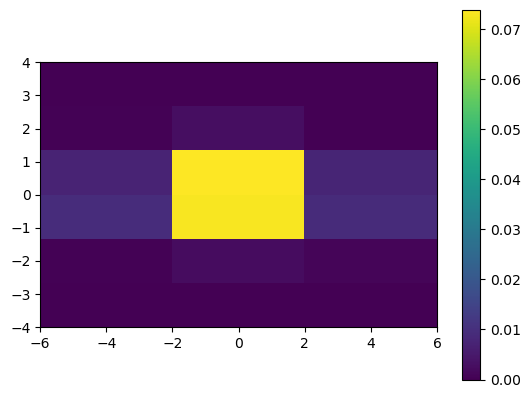

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(1000)
y = np.random.randn(1000)

hist, xedges, yedges = np.histogram2d(x, 
                                        y, 
                                        bins=(6,3), 
                                        density=True,
                                        range=[[-6, 6], [-4, 4]])

plt.imshow(hist, interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar()
plt.show()

In [33]:
hist

array([[0.       , 0.       , 0.       ],
       [0.000375 , 0.0031875, 0.000375 ],
       [0.008625 , 0.073125 , 0.0076875],
       [0.0080625, 0.06975  , 0.0095625],
       [0.0001875, 0.0061875, 0.000375 ],
       [0.       , 0.       , 0.       ]])

In [31]:
xedges.shape

(7,)

In [32]:
yedges.shape

(4,)

In [ ]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.models import LinearColorMapper, ColorBar, ColumnDataSource

def heatmap_cds(x, y, bins=50):
  """
  Creates a heatmap using np.histogram2d and Bokeh with ColumnDataSource.

  Args:
    x: x-axis data.
    y: y-axis data.
    bins: Number of bins for the histogram.
  """

  # Calculate the 2D histogram
  hist, xedges, yedges = np.histogram2d(x, y, bins=bins,)
  hist = hist.ravel()

  # Create the data source
  data = dict(
      image=[hist[i,:] for i in range(hist.shape[0])],  # Note: hist is wrapped in a list
  )
  source = ColumnDataSource(data)

  # Create the plot
  p = figure(title="Heatmap using np.histogram2d and ColumnDataSource")

  # Use LinearColorMapper to map the histogram values to colors
  color_mapper = LinearColorMapper(palette="Viridis256", low=hist.min(), high=hist.max())

  # Create the heatmap using p.rect with the data source
  p.rect(
      x="x",
      y="y",
      width="width",
      height="height",
      source=source,
      fill_color={"field": "image", "transform": color_mapper},
      line_color=None,
  )

  # Add a color bar
  color_bar = ColorBar(color_mapper=color_mapper, location=(0, 0))
  p.add_layout(color_bar, "right")

  # Show the plot
  show(p)

# Generate some sample data
x = np.random.randn(1000)
y = np.random.randn(1000)

# Call the function to create the heatmap
heatmap_cds(x, y)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [45]:
x = np.random.randn(1000)
y = np.random.randn(1000)
hist, xedges, yedges = np.histogram2d(x, y, bins=10)
X, Y = np.meshgrid(xedges, yedges) 
print(X.shape)
print(Y.shape)
print(hist.shape)

(11, 11)
(11, 11)
(10, 10)


In [46]:
xedges

array([-2.91464217, -2.32933672, -1.74403126, -1.15872581, -0.57342036,
        0.0118851 ,  0.59719055,  1.182496  ,  1.76780146,  2.35310691,
        2.93841236])

In [25]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import Viridis256

# Create a sample dataframe
data = {'x': [1, 2, 3], 'y': ['A', 'B', 'C'], 'values': [10, 20, 30]}
df = pd.DataFrame(data)

# Pivot the dataframe to create a matrix for the heatmap
df = df.pivot(index='y', columns='x', values='values')

# Create a ColumnDataSource from the pivoted dataframe
source = ColumnDataSource(df)

# Create a figure
p = figure(x_range=list(df.columns), y_range=list(df.index), 
           title="Heatmap", width=400, height=400, 
           toolbar_location=None, tools="")

# Create a color mapper
mapper = LinearColorMapper(palette=Viridis256, low=df.min().min(), high=df.max().max())

# Draw the heatmap rectangles
p.rect(x='x', y='y', width=1, height=1, source=source,
       fill_color={'field': 'values', 'transform': mapper},
       line_color=None)

# Add a color bar
color_bar = ColorBar(color_mapper=mapper, location=(0, 0))
p.add_layout(color_bar, 'right')

# Show the plot
show(p)

ValueError: failed to validate ColumnDataSource(id='p1194', ...).data: expected a dict of type ColumnData(String, Seq(Any)), got a dict with invalid keys: 1, 2, 3

In [ ]:
import numpy as np
from bokeh.models import HoverTool
from bokeh.plotting import figure, show
import pandas as pd

x = 2 + 2*np.random.standard_normal(500)
y = 2 + 2*np.random.standard_normal(500)

p = figure(match_aspect=True, tools="wheel_zoom,reset")
p.background_fill_color = '#440154'
p.grid.visible = False

p.hexbin(x, y, size=0.5, hover_color="pink", hover_alpha=0.8)

hover = HoverTool(tooltips=[("count", "@c"), ("(q,r)", "(@q, @r)")])
p.add_tools(hover)

show(p)

In [ ]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import Viridis256, Magma
import pandas as pd


x = np.random.randn(1000)
y = np.random.randn(1000)

hist, xedges, yedges = np.histogram2d(x, y, bins=(10,15), range=[[-1,1],[-1.78,1.78]], density=True)
xcenters = np.tile(np.linspace(xedges[0],xedges[-1],15),10)
ycenters = np.repeat(np.linspace(yedges[0],yedges[-1],10),15)
out = pd.DataFrame({'x': xcenters, 'y': ycenters, 'image': hist.flatten()})

# Create data source for the plot
source = ColumnDataSource(data=out)

# Create color mapper
mapper = LinearColorMapper(palette=Viridis256, low=0, high=1)

p = figure(width=1100, height=800, toolbar_location="above")

  # Add heatmap rectangles
p.rect(x="x", y="y", width = 1, height=1, source=source, fill_color={'field': 'image', 'transform': mapper})

  # Add color bar

#p.add_layout(color_bar, 'right')




show(p)

In [1]:
# import modules
from bokeh.io import output_file, show
from bokeh.layouts import row
from bokeh.plotting import figure
import numpy as np
import random
 
 
# create a new plot
# instantiating the figure object
fig1 = figure(title="Plot 1")
 
# coordinates
x = [[[[0, 0, 1, 1]]],
     [[[2, 2, 4, 4], [2.5, 2.5, 3.5, 3.5]]],
     [[[2, 0, 4]]]]
y = [[[[2.5, 0.5, 0.5, 2.5]]],
     [[[1, 0, 0, 1], [0.75, 0.25, 0.25, 0.75]]],
     [[[2, 0, 0]]]]
 
# color values of the polygons
color = ["red", "purple", "yellow"]
 
# fill alpha values of the polygons
fill_alpha = 0.5
 
# plotting the graph
fig1.multi_polygons(x, y,
                    color=color,
                    fill_alpha=fill_alpha)
 
 
# create another plot
# coordinates
x = np.arange(5)
y = x**2
z = x*3
p = np.linspace(1, 20, 7)
q = np.linspace(1, 10, 7)
r = np.linspace(1, 30, 5)
a = np.arange(31)
 
# creating an empty figure with specific plot
# width and height
fig2 = figure(title="Plot 2")
 
# plotting the points in the form of
# circular glyphs
fig2.circle(x, y, color="red", size=20)
 
# plotting the points in the form of
# square glyphs
fig2.square(x, z, color="blue", size=15, alpha=0.5)
 
# plotting the points in the form of
# hex glyphs
fig2.hex(y, z, color="green", size=10, alpha=0.7)
 
# drawing a line between the plotted points
fig2.line(x, y, color="green", line_width=4)
 
# plotting the points in the form of
# inverted triangle glyph
fig2.inverted_triangle(p, q, color="yellow", size=20, alpha=0.4)
 
# plotting the points in the form of
# diamond glyphs
fig2.diamond(x, r, color="purple", size=16, alpha=0.8)
 
# plotting the points in the form of
# cross glyphs
fig2.cross(a, a, size=14)
 
 
# create a third plot
# generating the points to be plotted
x = []
y = []
for i in range(100):
    x.append(i)
for i in range(100):
    y.append(1 + random.random())
 
# parameters of line 1
line_color = "red"
line_dash = "solid"
legend_label = "Line 1"
 
fig3 = figure(title="Plot 3")
 
# plotting the line
fig3.line(x, y,
          line_color=line_color,
          line_dash=line_dash,
          legend_label=legend_label)
 
# plotting line 2
# generating the points to be plotted
x = []
y = []
for i in range(100):
    x.append(i)
for i in range(100):
    y.append(random.random())
 
# parameters of line 2
line_color = "green"
line_dash = "dotdash"
line_dash_offset = 1
legend_label = "Line 2"
 
# plotting the line
fig3.line(x, y,
          line_color=line_color,
          line_dash=line_dash,
          line_dash_offset=line_dash_offset,
          legend_label=legend_label)
 
# depict visualization
show(row(fig1, fig2, fig3))

In [ ]:
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.io import curdoc

# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

# Create a plot
p = figure(title="Interactive Y-Range Plot", x_axis_label='X', y_axis_label='Y')
p.line('x', 'y', source=source, line_width=2)

# Create a slider to change the y-axis range
slider = Slider(start=0, end=10, value=1, step=0.1, title="Y-Range")

# Update function to change y-axis range
def update(attr, old, new):
    p.y_range.start = -slider.value
    p.y_range.end = slider.value

slider.on_change('value', update)


# Layout
layout = column(p, slider)

# Add the layout to the current document
curdoc().add_root(layout)

# Save and show the plot
output_file("interactive_y_range_plot.html")
show(layout)


You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/js_callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html

